optimale Parameter: [50.94214315 59.04779422]


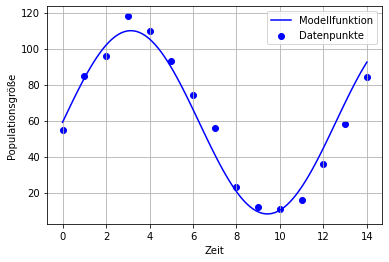

0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

class beispielkonstruktion:
    def __init__(self, basisfkt, x_values, y_values):
        self.m=len(x_values)    #Dimension von w
        self.p=len(basisfkt(1)) #Dimension von theta1
        self.x_values=x_values
        self.y_values=y_values
    
    def m(self, theta, x):
        return np.dot(theta,basisfkt(x)) #erstellen der Modellfunktion aus basisfkt und parameter
    
    
    def fkt(self, theta): #Erstellung der Zielfunktion 
        f=0
        for i in range(self.m):
            f=f+(np.dot(theta,basisfkt(self.x_values[i]))-self.y_values[i])**2
        return 0.5*f 

#plotten der Modellfunktion mit optimlalen Parametern thetaoptimal    
def plot_functions(beispiel, thetaoptimal):
    def f(x):
        return np.dot(thetaoptimal,basisfkt(x))
        
    x_values=np.linspace(min(beispiel.x_values), max(beispiel.x_values), 100)
    y1_values=f(x_values)
    plt.plot(x_values, y1_values, color='blue', label="Modellfunktion")
    plt.scatter(beispiel.x_values, beispiel.y_values, color='blue', marker='o', label="Datenpunkte")
    plt.legend()
    plt.xlabel('Zeit')
    plt.ylabel('Populationsgröße')
    plt.grid(True)
    plt.show()
    return 0
    
#Definition Beispiel Tierpopulation mit einer Modellfunktion:

def basisfkt(x):
    return np.array([np.sin(0.5*x), 1], dtype=object)
  
parameter=np.array([50, 60])

messwerte=[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],[55, 85, 96, 118, 110, 93, 74, 56, 23, 12, 11, 16, 36, 58, 84]]

bsp=beispielkonstruktion(basisfkt, messwerte[0], messwerte[1])


initialvalue=[] 
for i in range(bsp.p):
        initialvalue.append(0)

minimum=minimize(bsp.fkt, initialvalue)
print('optimale Parameter:', minimum.x)
plot_functions(bsp, minimum.x)

